In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting different graphs and having an analysis
import seaborn as sns 
import geopy as gp


In [2]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%%html
<div>
    <img src="https://mir-s3-cdn-cf.behance.net/project_modules/1400/bf046050830487.58db8869deaff.gif">
</div>


In [5]:
dataset= pd.read_csv(r"C:\Users\HP\Downloads\Bangalore.csv")

In [6]:
dataset.dropna()


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


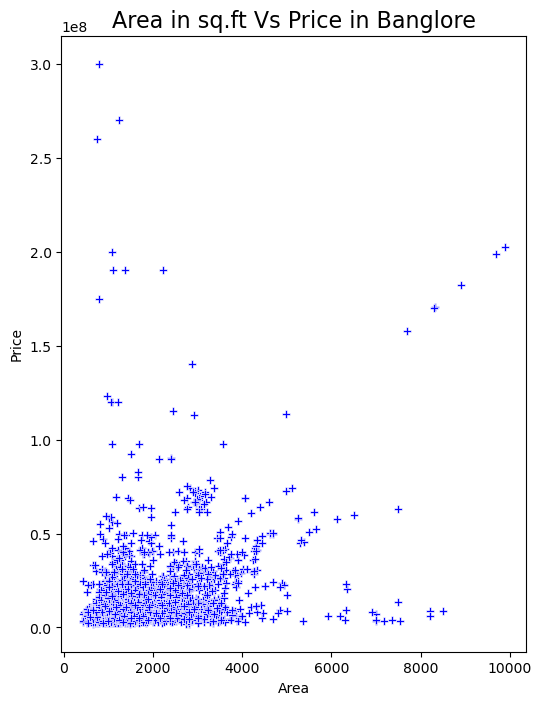

In [7]:
def scatter_plot(data,title,c):
    sns.scatterplot(x='Area',y ='Price', data=data, color=c, marker='P')
    plt.title("Area in sq.ft Vs Price in " + title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()
scatter_plot(dataset,"Banglore","b")

In [8]:
features=dataset.columns.tolist()
print(features)

['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']


In [9]:
dataset.rename(columns={'No. of Bedrooms':'Bedrooms', "Children'splayarea":'PlayArea',"Location":"Address"}, inplace=True)

In [10]:
price_outliers = np.percentile(dataset.Price, [5,90])
area_outliers = np.percentile(dataset.Area, [5,90])
print(price_outliers,"Is the price percentile outliner and \n",area_outliers,"is the area %ile outliner")

# create filters based on outlier
price_filter = (dataset.Price > price_outliers[0]) & (dataset.Price < price_outliers[1])
area_filter = (dataset.Area > area_outliers[0]) & (dataset.Area < area_outliers[1])
# apply filters
dataset= dataset[(price_filter) & (area_filter)]

[ 3100000.         19180000.00000011] Is the price percentile outliner and 
 [ 850. 2330.] is the area %ile outliner


In [11]:
arcgis_geocoder = gp.geocoders.ArcGIS()

def geocode(address:list,
            geocoder=arcgis_geocoder):
    
    '''geocode a list a addresses, returning the address and lat/long'''
    
    lat,lon = [],[]
    
    for add in address:
        
        try :
            coded = geocoder.geocode(add)
            
            lat.append(coded.latitude)
            lon.append(coded.longitude)
            
        except Exception as e:
            print(e)
            
            lat.append(np.nan)
            lon.append(np.nan)
            
            
    return pd.DataFrame({'Address':address,
                         'latitude':lat,
                         'longitude':lon})
            
# %%time

geocoded_loc= pd.read_csv(r"C:\Users\HP\Downloads\Bangalore.csv")
geocoded_loc = geocode(address= dataset.Address.unique())
#save location info
geocoded_loc.to_csv('geocoded.csv',index=False)


'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'
'NoneType' object has no attribute 'latitude'


In [12]:
dataset = dataset.merge(geocoded_loc,
              left_on="Address",
              right_on ="Address",
              how='inner')

dataset.shape

(4687, 42)

In [14]:
dataset.replace(9, np.nan, inplace=True)
dataset["Price"]=dataset["Price"]/100000
dataset.dropna()

,Price,Area,Address,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,latitude,longitude
0,78.88000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.047256,77.502027
1,78.88000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.047256,77.502027
2,78.88000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.047256,77.502027
3,94.12000,1247,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.047256,77.502027
4,105.00000,1486,Dasarahalli on Tumkur Road,3,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.047256,77.502027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,138.99999,1545,BTM Layout,3,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.914950,77.610000
3825,90.00000,1480,R T Nagar,3,1,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,12.284420,76.596530
3826,113.99999,1865,Kuvempu Layout on Hennur Main Road,3,1,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.737090,81.939550
3827,112.00000,1865,Kuvempu Layout on Hennur Main Road,3,1,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.737090,81.939550


In [15]:
dataset.columns.tolist()

['Price',
 'Area',
 'Address',
 'Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 'PlayArea',
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator',
 'latitude',
 'longitude']

In [32]:
y=dataset.Price
features=[
 'Area',
 'Bedrooms',
 'JoggingTrack',
 'Cafeteria',
 'Resale',
 '24X7Security',
 'LiftAvailable',
 'PlayArea',
 'latitude',
 'longitude']
X=dataset[features]

In [21]:
#Our Engines

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train)
print(y_train)


      Area  Bedrooms  JoggingTrack  Cafeteria  Resale  24X7Security  \
2725  1810         3           NaN        NaN       0           NaN   
2253  1305         2           0.0        0.0       0           0.0   
2265  1279         2           1.0        1.0       0           1.0   
4083  1690         4           NaN        NaN       1           NaN   
3357  1550         3           1.0        0.0       0           1.0   
...    ...       ...           ...        ...     ...           ...   
2851  1100         1           1.0        0.0       0           1.0   
1943  2150         4           NaN        NaN       0           NaN   
1537  1000         2           NaN        NaN       1           NaN   
3765  1257         2           0.0        0.0       0           0.0   
4410   940         2           NaN        NaN       0           NaN   

      LiftAvailable  PlayArea   latitude  longitude  
2725            NaN       NaN  13.072710  77.503170  
2253            1.0       1.0  12.90996

In [34]:
#The compact Engine
def train_model(m,name):
    model = m
    model.fit(X=X_train, y=y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print("{0} mae {1} ".format(name,mae))

train_model(DecisionTreeRegressor(max_depth=10),"Decision Tree Regressor")
#train_model(RandomForestRegressor(),"Random Forest Regressor") 

Decision Tree Regressor mae 22.52604986904531 
